<a href="https://colab.research.google.com/github/esa-prakasa/ConvNet/blob/master/test_12sp_exp1014.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.models import model_from_json
import os


# Load dan mount Google Drive
from google.colab import drive

# Pilihan user authorization dengan menggunakan account Google
drive.mount('/content/drive')

In [0]:
!ls -l "/content/drive/My Drive/data12_C/exp1014mowg/"

total 10522
-rw------- 1 root root     4666 Oct 17 10:13 modnet400_30.json
-rw------- 1 root root    10257 Oct 17 12:11 test_12sp_exp1014.ipynb
-rw------- 1 root root 10758040 Oct 17 10:13 wood12C400_30.h5


In [0]:
train_data_dir = '/content/drive/My Drive/data12_C/train'  
validation_data_dir = '/content/drive/My Drive/data12_C/valid'  
test_data_dir = '/content/drive/My Drive/data12_C/test' 

target_names = [item for item in os.listdir(train_data_dir) if os.path.isdir(os.path.join(train_data_dir, item))]



# load json and create model
json_file = open('/content/drive/My Drive/data12_C/exp1014mowg/modnet400_30.json', 'r')

loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)

# load weights into new model
model.load_weights('/content/drive/My Drive/data12_C/exp1014mowg/wood12C400_30.h5')
os.system('cls')
target_names = sorted(target_names)


print("Loaded model from disk")
print(target_names)










Loaded model from disk
['10091', '12672', '13381', '18212', '21684', '33497', '33963', '34013', '6171631', '6867', '7012', 'N4127']


In [0]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 398, 398, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 199, 199, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 197, 197, 32)      18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 96, 96, 16)        4624      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 48, 48, 16)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 16)       

In [132]:
import numpy as np
import matplotlib.pyplot as plt

from keras.preprocessing import image
className = target_names
print(className)


rootDir ='/content/drive/My Drive/data12_C/test/'

idxFig = 0;

plt.figure(figsize=(18,30))

noTestedImages = 15
dimSz = 400
idxWd = 0
y_test_wd = []
y_pred_wd = []

y_test_wd = np.ndarray([1], dtype=np.int64)
y_test_wd[0] = 0
y_pred_wd = np.ndarray([1], dtype=np.int64)
y_pred_wd[0] = 0


for idx in range(12):
  #print('---------------',className[idx],'-------------------')
  correctAns = 0
  for idxSp in range(noTestedImages):
    #fullPath = rootDir+className[idx]+'/'+className[idx]+str(idxSp+1)+'.jpg'
    #print(fullPath)

    fullPath = rootDir+className[idx]+'/'; 
    arr = os.listdir(fullPath)
    #print(str(idx)+' '+str(idxSp)+' ')
    fullPathToRead = fullPath+arr[idxSp]
        
    test_image = image.load_img(fullPathToRead, target_size =(dimSz, dimSz))
    pics = test_image
    
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    #result = classifier.predict(test_image)
    result = model.predict(test_image)
    classIdx = np.argmax(result)
    print(str(idx)+"  "+str(classIdx))
    
    if idxWd == 0:
      y_test_wd[idxWd] = idx
      y_pred_wd[idxWd] = classIdx
    else:
      y_test_wd = np.append(y_test_wd,[idx])
      y_pred_wd = np.append(y_pred_wd,[classIdx])
    
    idxWd = idxWd + 1
    
    #print("The image of "+className[idx]+str(idxSp+1)+" is identified as",className[classIdx], "  ",idxFig)  

    #idxFig = idxFig + 1;    
    #plt.subplot(12,15,idxFig)
    #plt.imshow(pics)
    #plt.title(className[idx]+":"+str(idxSp+1)+" --> "+className[classIdx])
    #plt.subplots_adjust(wspace=0.5, hspace=0.3)
    
    #print(className[idx]+" -> "+className[classIdx])

    if (className[idx] == className[classIdx]):
      correctAns = correctAns + 1
    accuracy = (correctAns/noTestedImages)*100
  
  print("%d: Accuracy of %s : %8.2f" % (idx, className[idx],accuracy))


print(y_test_wd.size)
print(y_pred_wd.size)

['10091', '12672', '13381', '18212', '21684', '33497', '33963', '34013', '6171631', '6867', '7012', 'N4127']
0  0
0  0
0  0
0  0
0  5
0  0
0  0
0  0
0  0
0  0
0  0
0  0
0  0
0  2
0  0
0: Accuracy of 10091 :    86.67
1  1
1  1
1  1
1  1
1  1
1  1
1  1
1  1
1  3
1  10
1  10
1  1
1  1
1  1
1  1
1: Accuracy of 12672 :    80.00
2  2
2  2
2  2
2  2
2  2
2  2
2  2
2  2
2  2
2  2
2  2
2  2
2  2
2  2
2  2
2: Accuracy of 13381 :   100.00
3  3
3  3
3  3
3  3
3  3
3  3
3  3
3  3
3  3
3  3
3  3
3  6
3  3
3  3
3  3
3: Accuracy of 18212 :    93.33
4  4
4  4
4  6
4  4
4  4
4  4
4  4
4  9
4  10
4  4
4  4
4  4
4  4
4  4
4  4
4: Accuracy of 21684 :    80.00
5  5
5  5
5  5
5  6
5  5
5  2
5  5
5  6
5  5
5  5
5  5
5  5
5  5
5  5
5  5
5: Accuracy of 33497 :    80.00
6  6
6  6
6  6
6  6
6  6
6  6
6  6
6  3
6  6
6  6
6  6
6  6
6  6
6  6
6  6
6: Accuracy of 33963 :    93.33
7  7
7  6
7  7
7  10
7  7
7  6
7  7
7  7
7  7
7  7
7  7
7  6
7  10
7  7
7  6
7: Accuracy of 34013 :    60.00
8  8
8  8
8  8
8  8
8  8
8  8


<Figure size 1296x2160 with 0 Axes>

In [133]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01)
y_pred = classifier.fit(X_train, y_train).predict(X_test)
cm = confusion_matrix(y_test_wd, y_pred_wd)

print(cm)

[[13  0  1  0  0  1  0  0  0  0  0  0]
 [ 0 12  0  1  0  0  0  0  0  0  2  0]
 [ 0  0 15  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 14  0  0  1  0  0  0  0  0]
 [ 0  0  0  0 12  0  1  0  0  1  1  0]
 [ 0  0  1  0  0 12  2  0  0  0  0  0]
 [ 0  0  0  1  0  0 14  0  0  0  0  0]
 [ 0  0  0  0  0  0  4  9  0  0  2  0]
 [ 0  0  0  0  0  0  0  0 15  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 15  0  0]
 [ 0  0  0  0  1  0  0  0  0  0 14  0]
 [ 0  0  0  0  0  0  0  0  1  0  0 14]]


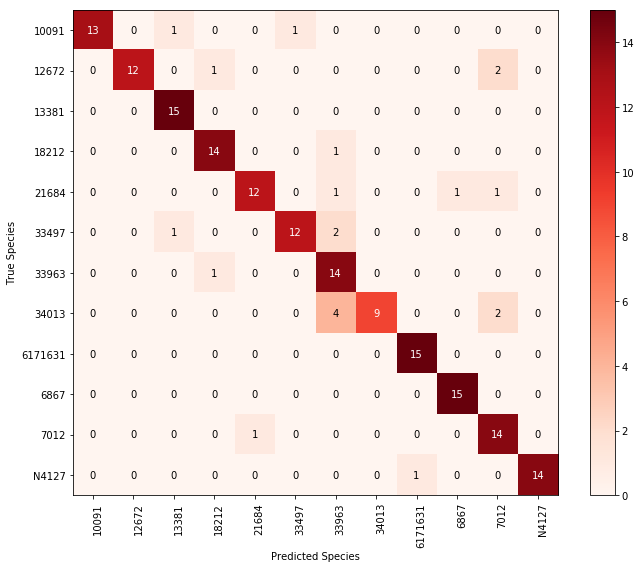

In [250]:
cm = confusion_matrix(y_test_wd, y_pred_wd)
#print(cm)

cmap=plt.cm.Reds
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
ax.figure.colorbar(im, ax=ax)

ax.figure.set_size_inches(10,8,True)

ax.set(xticks=np.arange(cm.shape[1]),
  yticks=np.arange(cm.shape[0]),
  xticklabels=className, yticklabels=className,
  title='',
  ylabel='True Species',
  xlabel='Predicted Species')

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
  rotation_mode="anchor")


# Loop over data dimensions and create text annotations.
#fmt = '.2f' if normalize else 'd'
fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
  for j in range(cm.shape[1]):
    ax.text(j, i, format(cm[i, j], fmt),
    ha="center", va="center",
    color="white" if cm[i, j] > thresh else "black")

fig.tight_layout()
plt.savefig('/content/drive/My Drive/data12_C/exp1014mowg/cm_real_simpNet.png')

15


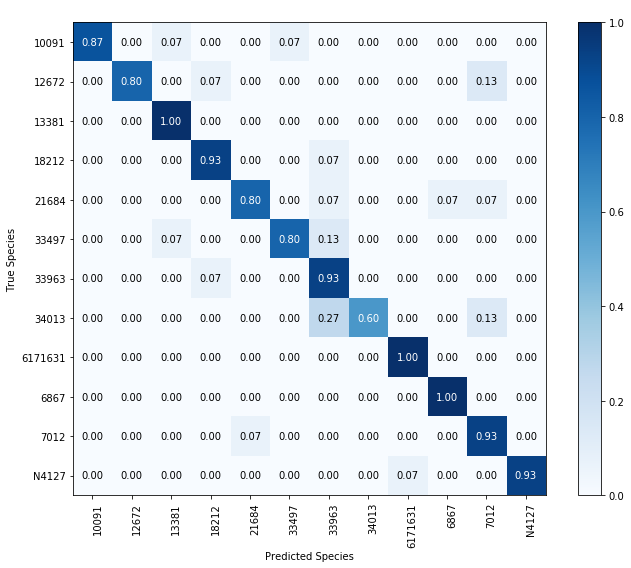

In [249]:
[m,n] = cm.shape
totalSum = np.ndarray.sum(cm[0,0:n])
print(totalSum)
#print(m)
cmf = cm.astype('float') / totalSum
#print(cmf)

cmap=plt.cm.Blues
fig, ax = plt.subplots()
im = ax.imshow(cmf, interpolation='nearest', cmap=cmap)
ax.figure.colorbar(im, ax=ax)
ax.figure.set_size_inches(10,8,True)

ax.set(xticks=np.arange(cmf.shape[1]),
  yticks=np.arange(cmf.shape[0]),
  xticklabels=className, yticklabels= className,
  title=' ',
  ylabel='True Species',
  xlabel='Predicted Species')

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
  rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
#fmt = '.2f' if normalize else 'd'
fmt = '.2f'
thresh = cmf.max() / 2.
for i in range(cmf.shape[0]):
  for j in range(cmf.shape[1]):
    ax.text(j, i, format(cmf[i, j], fmt),
    ha="center", va="center",
    color="white" if cmf[i, j] > thresh else "black")

fig.tight_layout()
plt.savefig('/content/drive/My Drive/data12_C/exp1014mowg/cm_normalise_simpNet.png')

In [258]:
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test_wd, y_pred_wd,beta=1.0,labels=None)

prec, recl, f1, _ = precision_recall_fscore_support(y_test_wd, y_pred_wd)
#print(prec)     
N = prec.size
print('{:2}'.format('No')+"   "+'{:8}'.format('Codes')+"  "+'{:4}'.format('Prec')+"    "+'{:4}'.format('Recl')+"   "+
      '{:4}'.format('F1-Sc'))
for i in range(N):
  print('{:2d}'.format(i+1)+"   "+'{:8}'.format(className[i])+"  "+'{:3.2f}'.format(prec[i])+"    "+
        '{:3.2f}'.format(recl[i])+"    "+'{:3.2f}'.format(f1[i])   )

print(" ")
print("Latex Format")
print(" ")

for i in range(N):
  print('{:2d}'.format(i+1)+" & "+'{:8}'.format(className[i])+" & "+'{:3.2f}'.format(prec[i])+"  &  "+
        '{:3.2f}'.format(recl[i])+"  &  "+'{:3.2f}'.format(f1[i]) +"\\"+" \hline"  ) 
  
#  3	&	13381	&	0.77	&	0.77	&	0.77	\\ \hline

No   Codes     Prec    Recl   F1-Sc
 1   10091     1.00    0.87    0.93
 2   12672     1.00    0.80    0.89
 3   13381     0.88    1.00    0.94
 4   18212     0.88    0.93    0.90
 5   21684     0.92    0.80    0.86
 6   33497     0.92    0.80    0.86
 7   33963     0.64    0.93    0.76
 8   34013     1.00    0.60    0.75
 9   6171631   0.94    1.00    0.97
10   6867      0.94    1.00    0.97
11   7012      0.74    0.93    0.82
12   N4127     1.00    0.93    0.97
 
Latex Format
 
 1 & 10091    & 1.00  &  0.87  &  0.93\ \hline
 2 & 12672    & 1.00  &  0.80  &  0.89\ \hline
 3 & 13381    & 0.88  &  1.00  &  0.94\ \hline
 4 & 18212    & 0.88  &  0.93  &  0.90\ \hline
 5 & 21684    & 0.92  &  0.80  &  0.86\ \hline
 6 & 33497    & 0.92  &  0.80  &  0.86\ \hline
 7 & 33963    & 0.64  &  0.93  &  0.76\ \hline
 8 & 34013    & 1.00  &  0.60  &  0.75\ \hline
 9 & 6171631  & 0.94  &  1.00  &  0.97\ \hline
10 & 6867     & 0.94  &  1.00  &  0.97\ \hline
11 & 7012     & 0.74  &  0.93  &  0.82\ \hlin